## Objective: Understand the consumer profiles and demographics. The CEO is looking to improve his understanding of relationship between real estate prices and monthly payments against the key consumer demographic parameters in the state. 

In [1]:
#Note: Python version 3.6.5
#Packages to import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Go back to default value (reset to shrunken value)
#pd.reset_option(“max_columns”)

In [3]:
path = 'gs://dataviz_projects/ProjectFiles/'
df = pd.read_csv (path + 'ss13hil.csv')

In [4]:
df.shape

(287799, 205)

In [5]:
df.head()

,insp,RT,SERIALNO,DIVISION,PUMA00,PUMA10,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPE,ACR,AGS,BATH,BDSP,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,MHP,MRGI,MRGP,MRGT,MRGX,REFR,RMSP,RNTM,RNTP,RWAT,RWATPR,SINK,SMP,STOV,TEL,TEN,TOIL,VACS,VALP,VEH,WATP,YBL,FES,FINCP,FPARC,GRNTP,GRPIP,HHL,HHT,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,OCPIP,PARTNER,PLM,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SVAL,TAXP,WIF,WKEXREL,WORKSTAT,FACRP,FAGSP,FBATHP,FBDSP,FBLDP,FBUSP,FCONP,FELEP,FFSP,FFULP,FGASP,FHFLP,FINSP,FKITP,FMHP,FMRGIP,FMRGP,FMRGTP,FMRGXP,FMVP,FPLMP,FREFRP,FRMSP,FRNTMP,FRNTP,FRWATP,FRWATPRP,FSINKP,FSMP,FSMXHP,FSMXSP,FSTOVP,FTAXP,FTELP,FTENP,FTOILP,FVACSP,FVALP,FVEHP,FWATP,FYBLP,WGTP1,WGTP2,WGTP3,WGTP4,WGTP5,WGTP6,WGTP7,WGTP8,WGTP9,WGTP10,WGTP11,WGTP12,WGTP13,WGTP14,WGTP15,WGTP16,WGTP17,WGTP18,WGTP19,WGTP20,WGTP21,WGTP22,WGTP23,WGTP24,WGTP25,WGTP26,WGTP27,WGTP28,WGTP29,WGTP30,WGTP31,WGTP32,WGTP33,WGTP34,WGTP35,WGTP36,WGTP37,WGTP38,WGTP39,WGTP40,WGTP41,WGTP42,WGTP43,WGTP44,WGTP45,WGTP46,WGTP47,WGTP48,WGTP49,WGTP50,WGTP51,WGTP52,WGTP53,WGTP54,WGTP55,WGTP56,WGTP57,WGTP58,WGTP59,WGTP60,WGTP61,WGTP62,WGTP63,WGTP64,WGTP65,WGTP66,WGTP67,WGTP68,WGTP69,WGTP70,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,NaN,H,2009000000061,3,3515,-9,2,17,1086032,1085467,36,0,1,NaN,NaN,2.0,2.0,8.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,NaN,NaN,2.0,9.0,1.0,NaN,1.0,NaN,NaN,2.0,7.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,61,34,10,12,35,62,11,61,34,34,37,39,36,36,10,60,37,37,62,37,34,63,34,34,60,37,35,35,64,10,9,11,11,63,37,35,11,63,34,11,62,36,11,11,36,62,11,59,34,35,36,34,37,36,10,62,34,37,58,34,36,61,37,34,59,34,35,35,59,11,10,10,11,60,33,37,11,63,36,11
1,400.0,H,2009000000075,3,1000,-9,2,17,1086032,1085467,6,1,1,1.0,NaN,1.0,3.0,1.0,2.0,0.0,200.0,2.0,2.0,3.0,3.0,0.0,2.0,300.0,2.0,1.0,1.0,5.0,NaN,NaN,1.0,9.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,65000.0,1.0,280.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,13000.0,0.0,4.0,4.0,4.0,1.0,1.0,1.0,3.0,0.0,NaN,0.0,0.0,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,598.0,3.0,0.0,0.0,11.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,7,1,13,7,12,7,2,6,2,12,8,2,2,6,9,7,5,7,10,13,9,2,12,5,9,8,2,7,2,11,8,3,1,5,9,5,6,5,2,2,9,8,2,6,2,6,15,5,12,2,7,11,10,5,8,5,5,6,1,1,7,13,2,5,2,9,13,7,12,2,8,13,11,6,9,5,7,9,14
2,NaN,H,2009000000108,3,3402,-9,2,17,1086032,1085467,15,3,1,1.0,NaN,1.0,3.0,2.0,2.0,0.0,80.0,2.0,2.0,120.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,6.0,2.0,1800.0,1.0,9.0,1.0,NaN,1.0,1.0,3.0,1.0,NaN,NaN,1.0,400.0,6.0,2.0,80000.0,2.0,2033.0,30.0,1.0,1.0,80000.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,1.0,0.0,NaN,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,28,16,16,4,14,16,14,17,5,17,16,25,25,4,4,25,17,4,16,26,24,16,15,4,15,16,15,19,4,14,13,26,30,5,5,29,14,4,12,5,5,15,17,25,15,14,17,16,24,15,16,4,5,27,28,4,16,25,14,5,5,16,17,24,14,18,15,16,26,14,17,4,4,27,30,5,16,23,19
3,NaN,H,2009000000132,3,3510,-9,2,17,1086032,1085467,60,4,1,1.0,NaN,1.0,3.0,2.0,2.0,0.0,1.0,2.0,2.0,20.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,2.0,500.0,1.0,9.0,1.0,NaN,1.0,1.0,3.0,1.0,NaN,NaN,2.0,2.0,8.0,2.0,72700.0,1.0,520.0,9.0,1.0,1.0,72700.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,0.0,0.0,2.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,2.0,NaN,NaN,1.0,0.0,NaN,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,103,57,58,65,64,61,14,55,98,19,60,18,60,109,62,103,18,59

In [ ]:
#Check for duplicates
df.duplicated(keep = False)

In [ ]:
#Looks like all are from IL as shown below (0 std).
df.describe()

In [ ]:
#Check Missing
import missingno as msno

<AxesSubplot:>

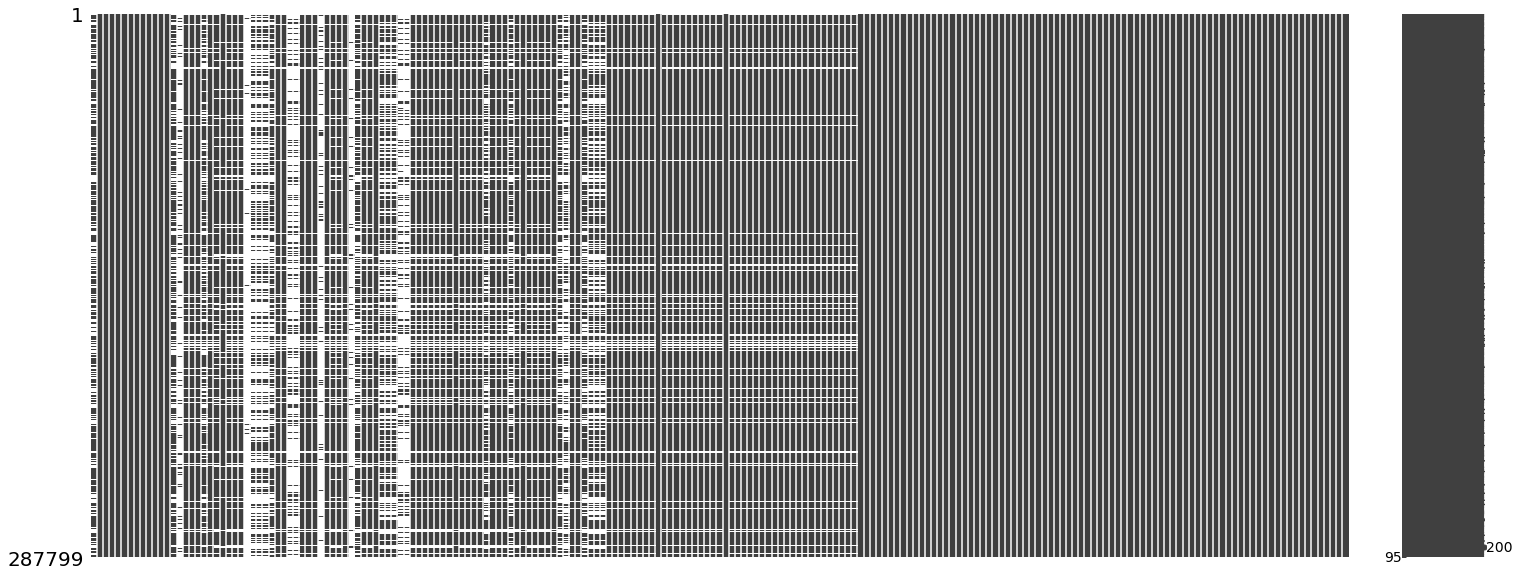

In [ ]:
msno.matrix(df)

## Filter into Chief Data Scientist Variables and some other potential columns
Important Note: Don't remove columns with more than 40% data missing yet because when filtered into Chicago, there was more data concentrated in that area than other areas. 

In [ ]:
df_IL = df[['PUMA00', 'PUMA10', 'ACR', 'ADJHSG', 'ADJINC', 'BATH', 'BDSP', 'BLD', 'BUS', 'CONP',
               'ELEP', 'FES', 'FINCP', 'FPARC', 'FS', 'FULP', 'GASP', 'GRNTP', 'HFL', 'HHL', 'HINCP', 
               'LNGI', 'MRGP', 'MULTG', 'NP', 'OCPIP', 'RMSP', 'RNTP', 'SERIALNO', 'SMP', 'TAXP', 'TEN', 
               'TYPE', 'VALP', 'VEH', 'WATP', 'WIF', 'YBL']]
#df_IL.reindex(sorted(df_IL.columns), axis=1)
#'JWMNP' (Travel time to work), 'FRPIP', 'TBL', 'WKHP' (Usual hors worked per week past 12 months), 

In [ ]:
df_IL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287799 entries, 0 to 287798
Data columns (total 38 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PUMA00    287799 non-null  int64  
 1   PUMA10    287799 non-null  int64  
 2   ACR       196569 non-null  float64
 3   ADJHSG    287799 non-null  int64  
 4   ADJINC    287799 non-null  int64  
 5   BATH      264712 non-null  float64
 6   BDSP      264712 non-null  float64
 7   BLD       264712 non-null  float64
 8   BUS       196569 non-null  float64
 9   CONP      264712 non-null  float64
 10  ELEP      248615 non-null  float64
 11  FES       165331 non-null  float64
 12  FINCP     165452 non-null  float64
 13  FPARC     165452 non-null  float64
 14  FS        271702 non-null  float64
 15  FULP      248615 non-null  float64
 16  GASP      248615 non-null  float64
 17  GRNTP     61726 non-null   float64
 18  HFL       248615 non-null  float64
 19  HHL       248615 non-null  float64
 20  HINC

### Details derived later, but wanted to add earlier for easier analysis. 
### Important Note: field in IL that has more than 40% values missing because missing for most locations except Chicago are: RNTP (Monthly Rent) and GRNTP (Rent).  
#### Anything with a '!' was dropped because had more than 40% missing data in IL. 
#### Anything with a '!!' was dropped because had more than 40% missing data in Chicago. 
#### Adding detail description of fields. Emboldened fields are fields identified by CDS. 
'PUMA00', Census 2000 definition for data collected prior to 2012. Use in combination with PUMA10

'PUMA10', n 2010 Census definition for data Collected in 2012 or later

!!'ACR', Lot size (less than 1 acre, 1-10 acres, 10+)

'ADJHSG',* The values of ADJHSG inflation-adjusts reported housing costs to 2013 dollars. Applies to CONP, ELEP, FULP, GASP

'ADJINC',** ADJINC inflation-adjusts reported income to 2013 dollars. Applies to FINCP, HINCP

'BATH', Bathtub or shower

**'BDSP'** , # of bedroom

'BLD', units in structure

!!'BUS', Business or medical office on property

'CONP', Condo fee (monthly amount)*

**'ELEP'**, Electricity (monthly cost)*

'FES', Family type and employment status

**'FINCP'**, Family income (past 12 months)**

'FPARC', Family presence and age of related children

'FS', Yearly food stamp/Supplemental Nutrition Assistance Program recipiency

**'FULP', Fuel cost(yearly cost for fuels other than gas and electricity)* 

**'GASP'**, Gas (monthly cost)*

! 'GRNTP', Gross Rent (monthly amount)

'HFL', House heating fuel

'HHL', Household language

**'HINCP'**, Household income (past 12 months)**

Other DS **'JWMNP'**, Travel time to work 

'LNGI', Limited English speaking households

**!!'MRGP'**, First mortgage payment (monthly amount)*

'MULTG', Multigenerational Household

'NP', Number of person records following this housing record

'OCPIP', Selected monthly owner costs as a percentage of household income during the past 12 months 

**'RMSP'**, # of Rooms

**! 'RNTP'**, Monthly Rent

'SERIALNO', 'Serial_No',

**! !!'SMP'**, Total payment on all second and junior mortgages and home equity loans (monthly amount)

**'TAXP'**, Property taxes (yearly amount) 

'TEN', Tenure (vacant, owned with morgage or loan, owned free and clear, rented, occupied without payment of rent)

'TYPE', Type_Of_Unit

**'VALP'**, Property Value

**'VEH'**, vehicles (1 ton or less) available

'WATP', Water (yearly cost)

'WIF', Workers in family during the past 12 months

Other DS **'WKHP'**, Usual hors worked per week past 12 months

'YBL', Year_Built

In [ ]:
data_dict = {'SERIALNO':'Serial_No',
             'NP':'Number_Of_Person',
             'BDSP':'Number_Of_Bedrooms', 
             'ELEP':'Electricity_Monthly_Cost',
             'FULP':'Fuel_Cost',
             'GASP':'Gas',
             'MRGP':'First_Mortgage_Payment_Monthly',
             'RMSP':'Number_Of_Rooms',
             'RNTP':'Monthly_Rent',
             'SMP':'Total_Payment_Second_Junior_Mortgages_Home_Loans',
             'VALP':'Property_Value',
             'VEH':'Vehicles_Available',                                          
             'FINCP':'Family_Income',
             'HINCP':'Household_Income',                                          
             'TAXP':'Property_Taxes',
             'TYPE':'Type_Of_Unit',
             'WATP':'Water',
             'YBL':'Year_Built', 
             'ACR':'Lot_Size',
             'ADJHSG':'InflationAd_HousingCosts_2013USD',
             'ADJINC':'InflationAd_ReportedIncome_2013USD',
             'BLD':'Structure_Units',
             'BUS':'Business_Medical_onProp',
             'CONP':'Condo_Fee',
             'FES':'FamilyType_EmploymentStatus',
             'FPARC':'FamilyPresence_ChildrenAge',
             'FS':'SNAP_Program',
             'GRNTP':'Rent',
             'HFL':'Heating_Fuel',
             'HHL':'Language',
             'LNGI':'Limited_EnglishSpeaking',
             'MULTG':'MultiGen',
             'OCPIP':'PerCosts_HouseholdIncome',
             'TEN':'Tenure',
             'WIF':'WorkersInFamily'}

In [ ]:
df_IL = df_IL.rename(columns = data_dict)

IL data with columns with more than 40% dropped 

In [ ]:
#Remove columns that are missing more than 40% of data
limitPer = len(df_IL) * .40
df_IL = df_IL.dropna(thresh=limitPer, axis=1)

<AxesSubplot:>

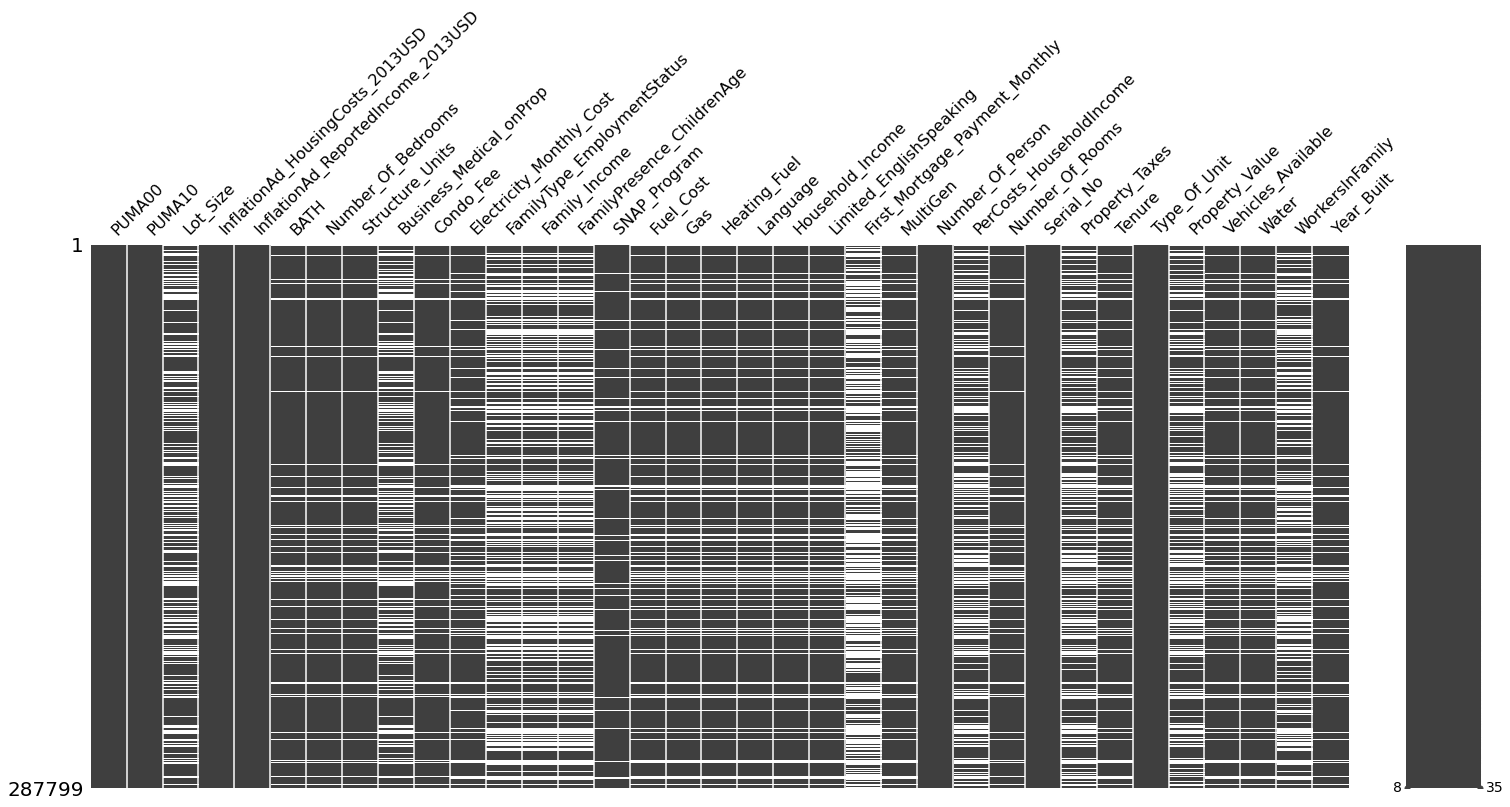

In [ ]:
msno.matrix(df_IL)

In [ ]:
df_IL.shape

(287799, 35)

In [ ]:
#Sort values by PUMA00 code for KNN imputation and other analysis
df_IL = df_IL.sort_values('PUMA00')

Q1: Should we get rid of PUMAA00 -9? Which is 2012+

In [ ]:
df_IL.PUMA00.unique()

array([  -9,  101,  102,  103,  200,  300,  400,  500,  600,  700,  800,
        900, 1000, 1101, 1102, 1201, 1202, 1300, 1400, 1500, 1600, 1700,
       1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800,
       2900, 3001, 3002, 3003, 3004, 3005, 3006, 3101, 3102, 3103, 3104,
       3201, 3202, 3203, 3204, 3205, 3206, 3301, 3302, 3303, 3304, 3305,
       3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411,
       3412, 3413, 3414, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508,
       3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519])

In [ ]:
df_IL['PUMA00'].value_counts(normalize = True)

-9       0.405092
 2200    0.013506
 900     0.012644
 800     0.012078
 1000    0.011831
 2100    0.011376
 3405    0.010956
 2500    0.010716
 400     0.010285
 200     0.010097
 3510    0.009892
 1400    0.009771
 2000    0.009434
 3509    0.009409
 3404    0.009086
 3502    0.008982
 3403    0.008805
 3303    0.008638
 300     0.008492
 700     0.008464
 1600    0.008447
 2900    0.008374
 1202    0.008346
 2600    0.008179
 101     0.008120
 1102    0.007943
 500     0.007912
 3501    0.007794
 1900    0.007648
 3006    0.007623
 1800    0.007460
 1101    0.007318
 2400    0.007259
 600     0.007127
 2800    0.007127
 3402    0.007074
 3411    0.006974
 3407    0.006928
 102     0.006904
 3515    0.006838
 3514    0.006755
 1500    0.006630
 3413    0.006619
 3206    0.006303
 2700    0.006258
 3201    0.006251
 3101    0.006185
 2300    0.006081
 3103    0.006042
 3408    0.005980
 3414    0.005959
 3513    0.005917
 3512    0.005896
 3104    0.005862
 3409    0.005834
 1201    0

In [ ]:
#df_IL = df_IL[~(df_IL['PUMA00']== -9)]

## Impute data using KNN and after impute, continue engineering data. 

In [ ]:
#IMPUTE USING KNN
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [ ]:
df_IL.head()

,PUMA00,PUMA10,Lot_Size,InflationAd_HousingCosts_2013USD,InflationAd_ReportedIncome_2013USD,BATH,Number_Of_Bedrooms,Structure_Units,Business_Medical_onProp,Condo_Fee,Electricity_Monthly_Cost,FamilyType_EmploymentStatus,Family_Income,FamilyPresence_ChildrenAge,SNAP_Program,Fuel_Cost,Gas,Heating_Fuel,Language,Household_Income,Limited_EnglishSpeaking,First_Mortgage_Payment_Monthly,MultiGen,Number_Of_Person,PerCosts_HouseholdIncome,Number_Of_Rooms,Serial_No,Property_Taxes,Tenure,Type_Of_Unit,Property_Value,Vehicles_Available,Water,WorkersInFamily,Year_Built
287798,-9,3530,1.0,1000000,1007549,1.0,1.0,2.0,2.0,0.0,1.0,NaN,NaN,NaN,2.0,2.0,1.0,1.0,1.0,15000.0,1.0,NaN,1.0,1,NaN,4.0,2013001492822,NaN,3.0,1,NaN,0.0,1.0,NaN,1.0
226827,-9,3208,1.0,1014531,1024887,1.0,4.0,2.0,2.0,0.0,120.0,1.0,71400.0,2.0,2.0,2.0,60.0,1.0,2.0,71400.0,1.0,1200.0,1.0,5,24.0,6.0,2012001422894,51.0,1.0,1,80000.0,3.0,780.0,3.0,5.0
226826,-9,3308,1.0,1014531,1024887,1.0,3.0,2.0,2.0,0.0,80.0,4.0,118000.0,4.0,2.0,2.0,40.0,1.0,1.0,118000.0,1.0,2200.0,1.0,2,26.0,5.0,2012001422884,65.0,1.0,1,250000.0,2.0,2600.0,0.0,5.0
226825,-9,2700,1.0,1014531,1024887,1.0,3.0,2.0,2.0,0.0,60.0,NaN,NaN,NaN,2.0,2.0,30.0,1.0,1.0,34300.0,1.0,210.0,1.0,1,23.0,5.0,2012001422876,48.0,1.0,1,129000.0,1.0,600.0,NaN,5.0
226824,-9,2200,1.0,1014531,1024887,1.0,1.0,3.0,2.0,0.0,60.0,NaN,NaN,NaN,1.0,2.0,60.0,3.0,1.0,8400.0,1.0,NaN,1.0,1,NaN,2.0,2012001422803,NaN,3.0,1,NaN,1.0,1.0,NaN,3.0


In [ ]:
#Apply KNN imputation algorithm
df_IL = pd.DataFrame(KNNImputer(n_neighbors = 3).fit_transform(df_IL), columns = df_IL.columns)

In [ ]:
df_IL.isna().sum()

#### Data Engineering: multiplying for inflation? Convert monthly charges to yearly? (No need to encode variables)

Inflation

In [ ]:
df_IL.head()

In [ ]:
df_IL.InflationAd_HousingCosts_2013USD.value_counts()

df_IL['CONP_adj'] = df_IL['CONP']*df_IL['ADJHSG'
df_IL['ELEP_adf'] = df_IL['ELEP']*df_IL['ADJHSG']
df_IL['FULP_adf'] = df_IL['FULP']*df_IL['ADJHSG']
df_IL['GASP_adf'] = df_IL['GASP']*df_IL['ADJHSG']

#(More than 40% missing values)   df_IL['MRGP_adf'] = df_IL['MRGP']*df_IL['ADJHSG']

df_IL['FINCP_adj'] = df_IL['FINCP']*df_IL['ADJINC']
df_IL['HINCP_adj'] = df_IL['HINCP']*df_IL['ADJINC']

Annual Calculations

In [ ]:
df_IL['Condo_Fee_y'] = 12*df['Condo_Fee']
df_IL['Electricity_Monthly_Cost_y'] = 12*df['Electricity_Monthly_Cost']
df_IL['Gas_y'] = 12*df['Gas']
df_IL['Rent_y'] = 12*df['Rent']
df_IL['First_Mortgage_Payment_Monthly_y'] = 12*df['First_Mortgage_Payment_Monthly']
df_IL['Monthly_Rent_y'] = 12*df['Monthly_Rent']
df_IL['Total_Payment_Second_Junior_Mortgages_Home_Loans_y'] = 12*df['Total_Payment_Second_Junior_Mortgages_Home_Loans']

## Look into Chicago

Chicago PUMA Map: https://www.chicagorehab.org/content/cms/documents/chicagopumsmap.pdf

    3501 Rogers Park, Edgewater, Uptown
    3502 Lake View, Lincoln Park
    3503 West Ridge, Lincoln Square, North Center
    3504 Forest Glen, North Park, Albany Park, Irving Park
    3505 Edison Park, Norwood Park, Jefferson, Dunning, O’Hare
    3506 Portage Park, Montclare, Belmont Cragin
    3507 Austin
    3508 Humboldt Park, West Garfield Park, East Garfield Park, North Lawndale
    3509 Hermosa, Avondale, Logan Square, West Town
    3510 Near North Side, Near West Side, Loop,  Near South Side
    3511 South Lawndale, Lower West Side
    3512 Armour Square, Archer Heights, Brighton Park, McKinley Park, Bridgeport, New City
    3513 Garfield Ridge, West Elsdon, Gage Park, Clearing, West Lawn, Chicago Lawn
    3514 Douglas, Oakland, Fuller Park, Grand Boulevard, Kenwood, Washington Park, Hyde Park
    3515 Woodlawn, South Shore, Chatham, Avalon Park, Greater Grand Crossing
    3516 West Englewood, Englewood, Auburn Gresham, Washington Heights
    3517 Ashburn, Beverly, Mount Greenwood, Morgan Park
    3518 Roseland, Pullman, West Pullman, Riverdale
    3519 South Chicago, Burnside, Calumet Heights, South Deering, East Side, Hegewisch

In [ ]:
df_chicago = df_IL[(df_IL['PUMA00']>=3501) & (df_IL['PUMA00']<=3519)]

In [ ]:
df_chicago['PUMA00'].value_counts()

In [ ]:
msno.matrix(df_chicago)

In [ ]:
#Remove columns that are missing more than 40% of data
limitPer = len(df_chicago) * .40
df_chicago = df_chicago.dropna(thresh=limitPer, axis=1)

In [ ]:
msno.matrix(df_chicago)

In [ ]:
df_chicago.columns

#### EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df_chicago.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
#Remove variables with high collinearity. 
#Collinearity to consider: RMSP vs BDSP, HINC vs FINCP (what are white squares?) 

In [ ]:
df_chicago.columns

#### Univariate Analysis

In [ ]:
fig = plt.figure(figsize=(25,5))
sns.countplot(x=df_chicago["BDSP"], order=df_chicago["BDSP"]) #, hue=df_chicago[''])